In [1]:
# open the image using stuff

import matplotlib.pyplot as plt
import numpy as np
import glob as glob
import torch
import cv2
import time
import imageio
import os

filename = '/data/jmomo/segment-anything/coord_-5.4,+18.6_2_1X.tif'

# pil_img = imageio.imread(filename)
# print(pil_img.shape)
image = np.memmap(filename, mode='c', dtype=np.uint8, shape=(1000, 2240, 2240)) # this should load the giant image into a np array in memory, 
#should be 2304, 2304
#data should be 16 bit
#image = np.memmap(filename, mode='c', dtype=np.uint16, shape=(1000, 2240, 2240))
#loading it in c mode prevents changes from affecting disk, only memory
print(image.shape)

(1000, 2240, 2240)


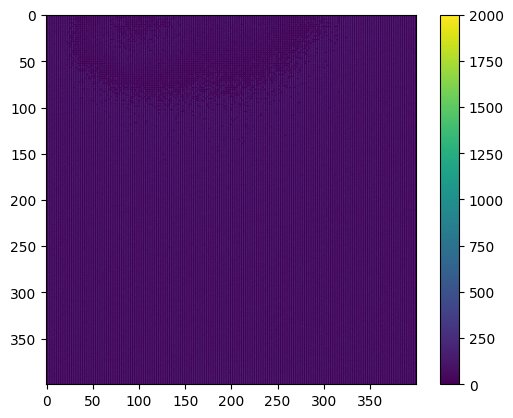

In [2]:
plt.imshow(image[15,600:1000, 1200:1600], vmin=0, vmax=2000)
plt.colorbar()
plt.show()

(2240, 2240)


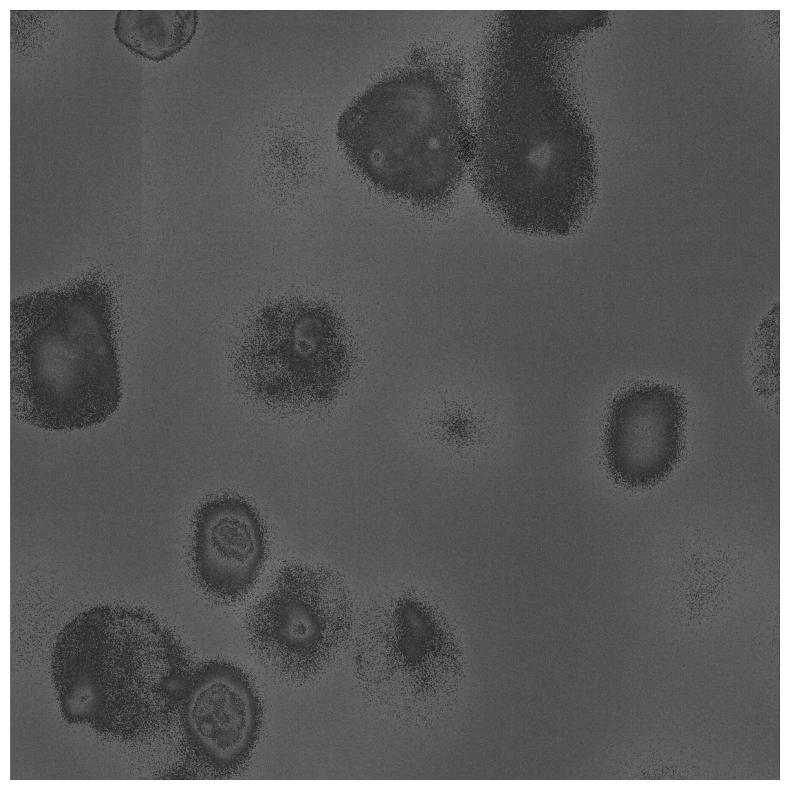

In [3]:
print(image[0].shape)
img = cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()

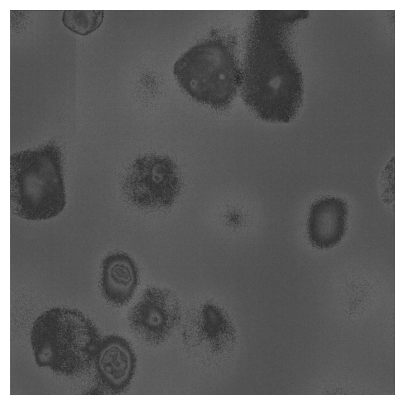

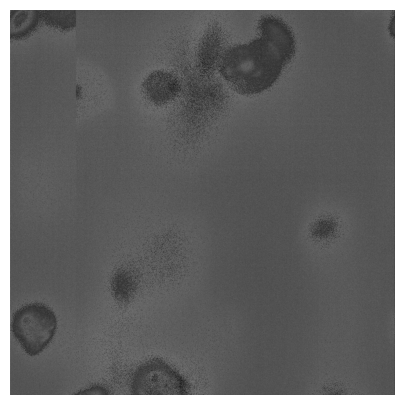

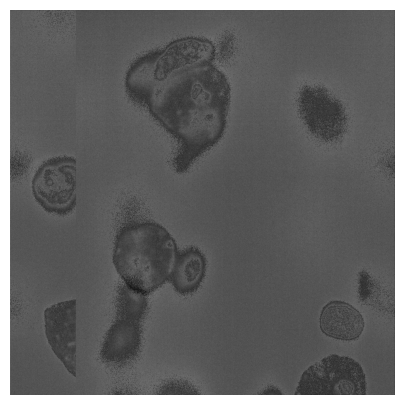

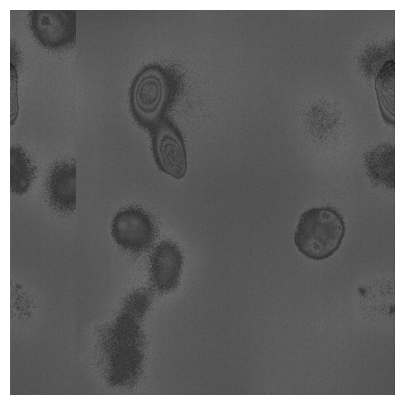

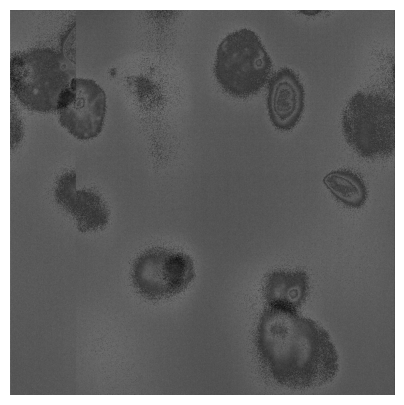

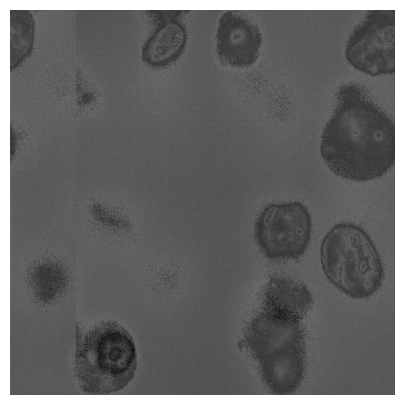

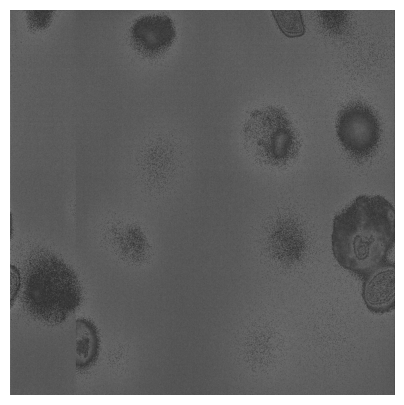

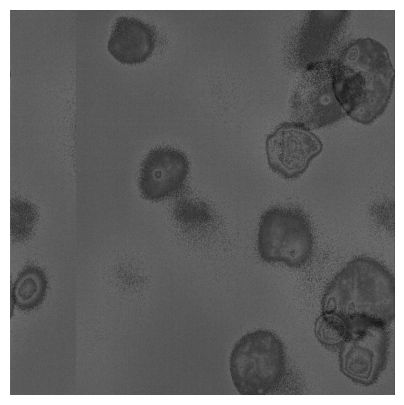

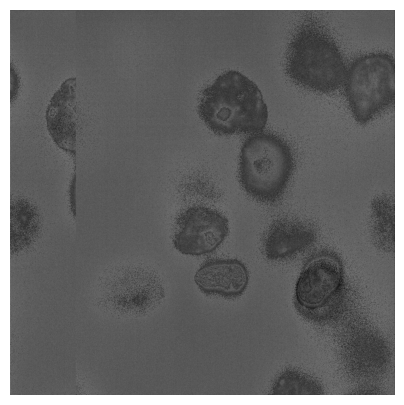

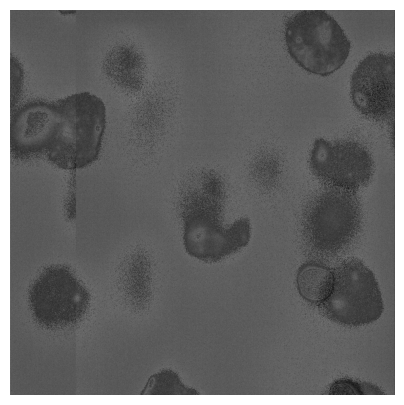

In [4]:
# preview some slices of the image
for i in range(0, image.shape[0], 100):
    img = cv2.cvtColor(image[i], cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [6]:
# run segment anything on some random slices of the image to test

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

import sys
sys.path.append("..")

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "../sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)
    

    

Elapsed time:  3.157118797302246


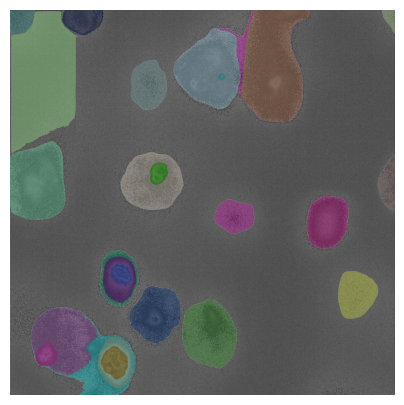

In [8]:
# run SAM on one slice of image

img = cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB)
initial_time = time.time()
masks = mask_generator.generate(img)
print("Elapsed time: ", time.time() - initial_time)
plt.figure(figsize=(5,5))
plt.imshow(img)
show_anns(masks)
plt.axis('off')
plt.show() 


Elapsed time:  3.0859029293060303


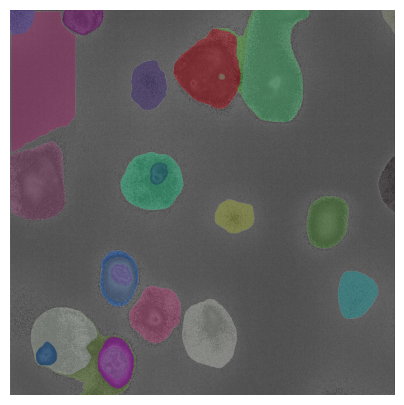

Elapsed time:  2.8963818550109863


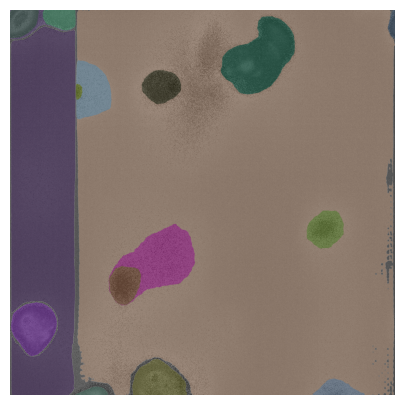

Elapsed time:  3.2402737140655518


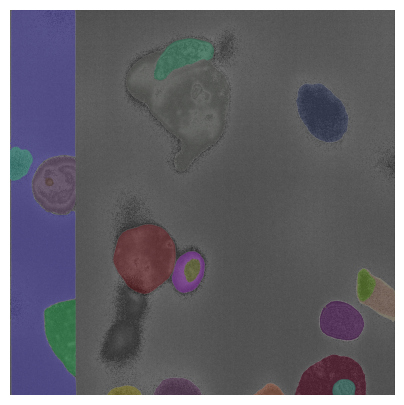

Elapsed time:  2.997990131378174


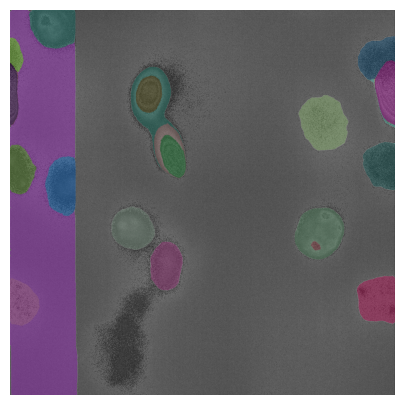

Elapsed time:  3.046386241912842


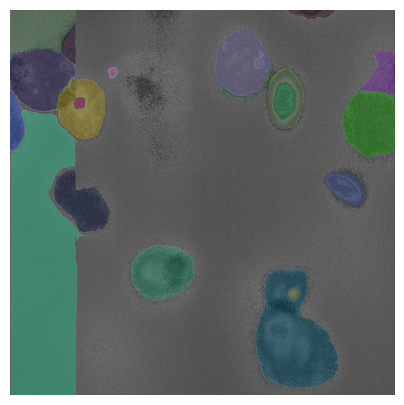

Elapsed time:  3.0811588764190674


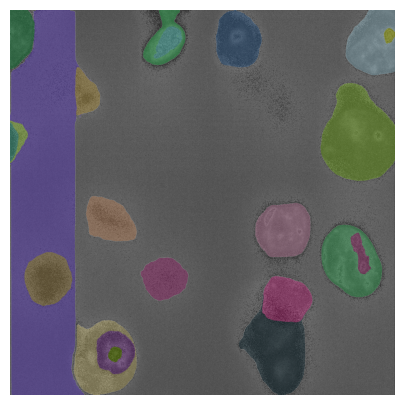

Elapsed time:  2.944913387298584


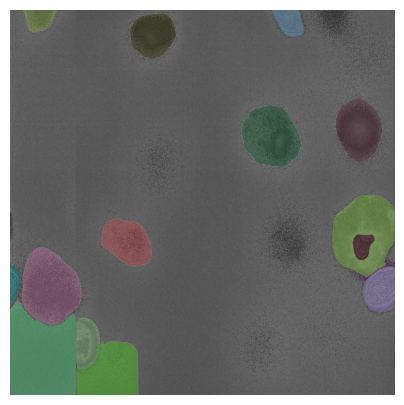

Elapsed time:  3.270966053009033


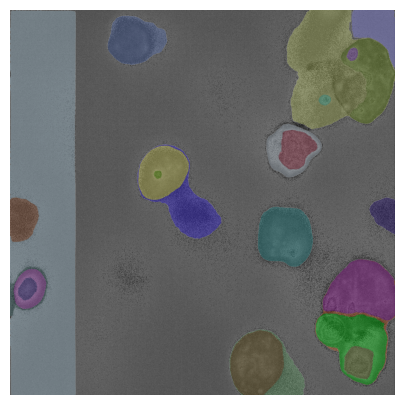

Elapsed time:  3.1929163932800293


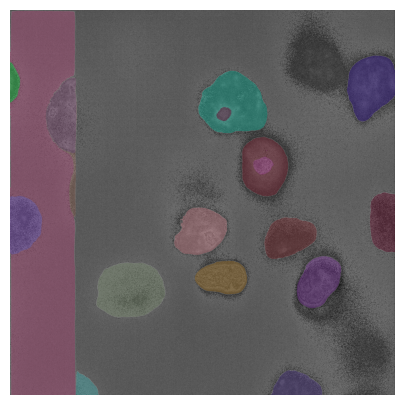

Elapsed time:  3.1044232845306396


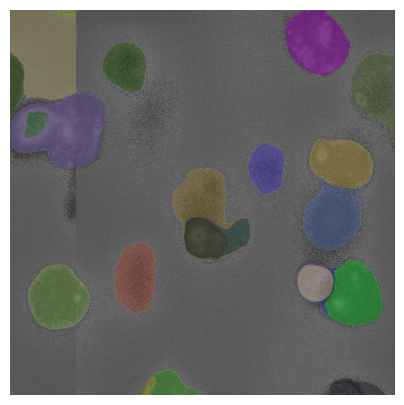

In [9]:
for i in range(0, image.shape[0], 100):
    img = cv2.cvtColor(image[i], cv2.COLOR_BGR2RGB)
    initial_time = time.time()
    masks = mask_generator.generate(img)
    print("Elapsed time: ", time.time() - initial_time)
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    show_anns(masks)
    plt.axis('off')
    plt.show() 